<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/redes_neurais_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
tf.__version__

'2.3.0'

In [11]:
import pathlib

data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', 
                                   fname = 'flower_photos', untar=True)

data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [13]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != 'LICENSE.txt'])
CLASS_NAMES

array(['dandelion', 'roses', 'daisy', 'tulips', 'sunflowers'],
      dtype='<U10')

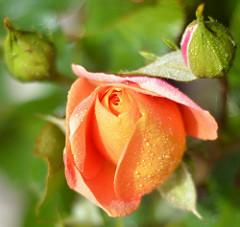

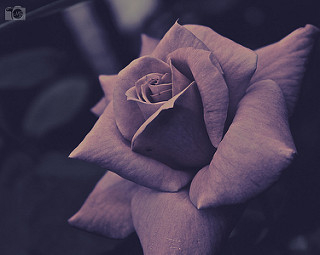

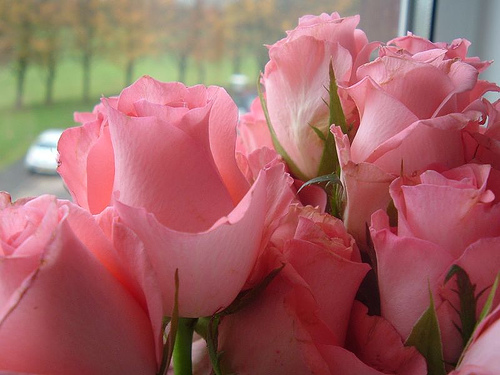

In [19]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
  display.display(Image.open(str(image_path)))

In [20]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [21]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [22]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes=list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


In [23]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
    ax = plt.subplot(5,5, n + 1)
    plt.imshow(image_batch[n])
    plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
    plt.axis('off')

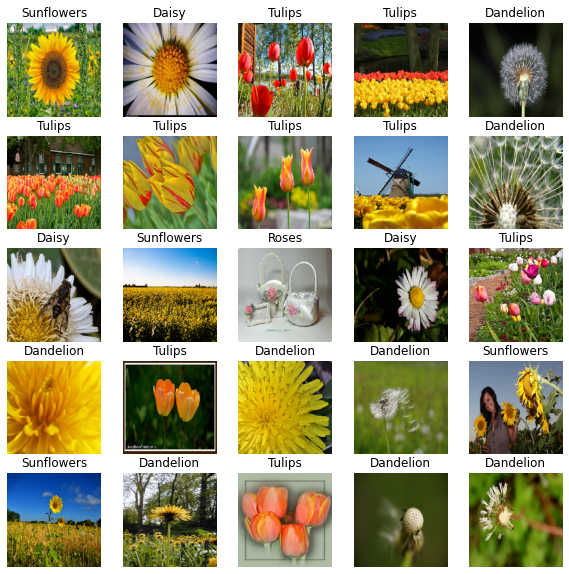

In [24]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [25]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
for f in list_ds.take(5):
  print(f.numpy())

b'/root/.keras/datasets/flower_photos/sunflowers/7176723954_e41618edc1_n.jpg'
b'/root/.keras/datasets/flower_photos/roses/9614492283_66020fb4eb_n.jpg'
b'/root/.keras/datasets/flower_photos/tulips/17781940352_a45e4289a5.jpg'
b'/root/.keras/datasets/flower_photos/daisy/4434592930_6610d51fca_m.jpg'
b'/root/.keras/datasets/flower_photos/tulips/3150964108_24dbec4b23_m.jpg'


In [34]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  return parts[-2] == CLASS_NAMES

In [35]:
def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [36]:
def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [37]:
labeled_ds = list_ds.map(process_path, num_parallel_calls = AUTOTUNE)

In [38]:
for image, label in labeled_ds.take(1):
  print('Image shape: ', image.numpy().shape)
  print('Label:', label.numpy())

Image shape:  (224, 224, 3)
Label: [False False False  True False]


In [41]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [42]:
train_ds = prepare_for_training(labeled_ds)

image_batch, label_batch = next(iter(train_ds))

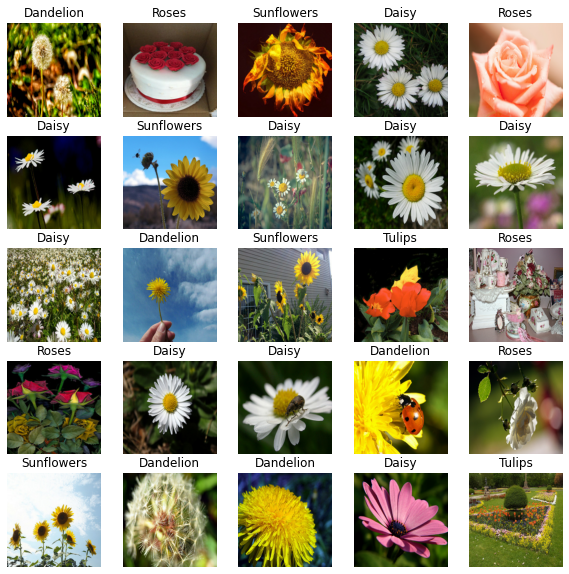

In [43]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [48]:
import time

default_timeout_steps = 1000

def timeit(ds, steps=default_timeout_steps):
  start = time.time()
  it = iter(ds)

  for i in range(steps):
    batch = next(it)
    if i%10 == 0:
      print('.', end = '')
    print()
    end = time.time()

    duration = end-start
    print('{} batches: {} s'.format(steps, duration))
    print('{:0.5f} Images /s'.format(BATCH_SIZE * steps/duration))

In [49]:
timeit(train_data_gen)

.
1000 batches: 0.12418627738952637 s
257677.42357 Images /s

1000 batches: 0.25182461738586426 s
127072.56476 Images /s

1000 batches: 0.36371397972106934 s
87981.22092 Images /s

1000 batches: 0.46982526779174805 s
68110.42784 Images /s

1000 batches: 0.5850903987884521 s
54692.40320 Images /s

1000 batches: 0.687730073928833 s
46529.88318 Images /s

1000 batches: 0.8053834438323975 s
39732.62704 Images /s

1000 batches: 0.9137058258056641 s
35022.21294 Images /s

1000 batches: 1.0307648181915283 s
31044.90902 Images /s

1000 batches: 1.1523091793060303 s
27770.32464 Images /s
.
1000 batches: 1.267634391784668 s
25243.87174 Images /s

1000 batches: 1.3810343742370605 s
23171.03803 Images /s

1000 batches: 1.4901678562164307 s
21474.09090 Images /s

1000 batches: 1.6022419929504395 s
19972.01430 Images /s

1000 batches: 1.719881296157837 s
18605.93523 Images /s

1000 batches: 1.8166069984436035 s
17615.25747 Images /s

1000 batches: 1.9443047046661377 s
16458.32565 Images /s

1000 bat

In [50]:
timeit(train_ds)

.
1000 batches: 2.554880142211914 s
12525.04940 Images /s

1000 batches: 2.688054084777832 s
11904.52238 Images /s

1000 batches: 2.771411895751953 s
11546.46123 Images /s

1000 batches: 2.873041868209839 s
11138.02077 Images /s

1000 batches: 2.9670395851135254 s
10785.16113 Images /s

1000 batches: 3.065619468688965 s
10438.34707 Images /s

1000 batches: 3.1667897701263428 s
10104.87033 Images /s

1000 batches: 3.274543523788452 s
9772.35446 Images /s

1000 batches: 3.368972063064575 s
9498.44623 Images /s

1000 batches: 3.473686695098877 s
9212.11462 Images /s
.
1000 batches: 3.5822057723999023 s
8933.04350 Images /s

1000 batches: 3.69631290435791 s
8657.27573 Images /s

1000 batches: 3.7925093173980713 s
8437.68527 Images /s

1000 batches: 3.8930459022521973 s
8219.78492 Images /s

1000 batches: 3.992445230484009 s
8015.13813 Images /s

1000 batches: 4.092357635498047 s
7819.45344 Images /s

1000 batches: 4.193880319595337 s
7630.16528 Images /s

1000 batches: 4.304592847824097 s


In [51]:
uncached_ds = prepare_for_training(labeled_ds, cache=False)
timeit(uncached_ds)

.
1000 batches: 2.70413875579834 s
11833.71228 Images /s

1000 batches: 2.789123773574829 s
11473.13730 Images /s

1000 batches: 2.846191644668579 s
11243.09393 Images /s

1000 batches: 2.920077323913574 s
10958.61392 Images /s

1000 batches: 2.9805564880371094 s
10736.25014 Images /s

1000 batches: 3.057417392730713 s
10466.34983 Images /s

1000 batches: 3.144822120666504 s
10175.45628 Images /s

1000 batches: 3.236006021499634 s
9888.73314 Images /s

1000 batches: 3.315246105194092 s
9652.37541 Images /s

1000 batches: 3.3925740718841553 s
9432.36590 Images /s
.
1000 batches: 3.4651424884796143 s
9234.82948 Images /s

1000 batches: 3.5400712490081787 s
9039.36609 Images /s

1000 batches: 3.6100966930389404 s
8864.02851 Images /s

1000 batches: 3.68038272857666 s
8694.74790 Images /s

1000 batches: 3.745288610458374 s
8544.06785 Images /s

1000 batches: 3.8280041217803955 s
8359.44763 Images /s

1000 batches: 3.899071455001831 s
8207.08222 Images /s

1000 batches: 3.968153476715088 s


In [52]:
filecache_ds = prepare_for_training(labeled_ds, cache='./flowers.tfcache')
timeit(filecache_ds)

.
1000 batches: 3.5879805088043213 s
8918.66606 Images /s

1000 batches: 3.6789824962615967 s
8698.05715 Images /s

1000 batches: 3.9004838466644287 s
8204.11038 Images /s

1000 batches: 3.9970815181732178 s
8005.84123 Images /s

1000 batches: 4.097938776016235 s
7808.80383 Images /s

1000 batches: 4.203100919723511 s
7613.42652 Images /s

1000 batches: 4.309282541275024 s
7425.83010 Images /s

1000 batches: 4.463122367858887 s
7169.86839 Images /s

1000 batches: 4.605870723724365 s
6947.65483 Images /s

1000 batches: 4.768927812576294 s
6710.10367 Images /s
.
1000 batches: 4.892768144607544 s
6540.26495 Images /s

1000 batches: 5.000057935714722 s
6399.92584 Images /s

1000 batches: 5.096038579940796 s
6279.38731 Images /s

1000 batches: 5.213599920272827 s
6137.79356 Images /s

1000 batches: 5.316094160079956 s
6019.45696 Images /s

1000 batches: 5.415594100952148 s
5908.86233 Images /s

1000 batches: 5.513008117675781 s
5804.45363 Images /s

1000 batches: 5.7368950843811035 s
5577.9